# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

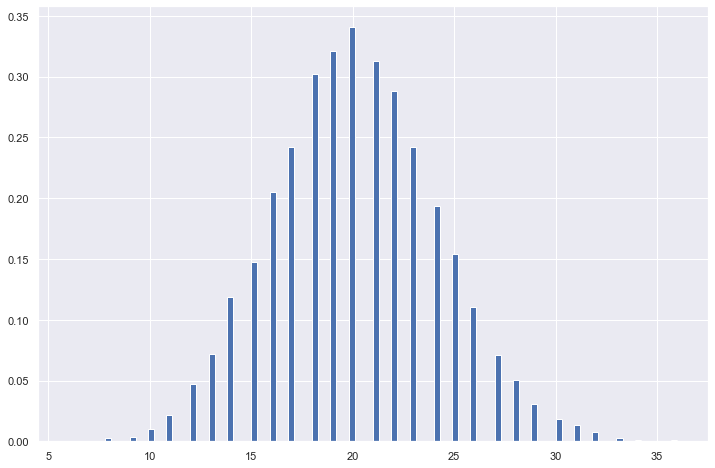

In [5]:
plt.hist(dataframe['binomial'], bins = 100, density = True)
plt.show()

A figura acima mostra que distribuição binomial em questão descreve o número de sucessos em 100 eventos se cada evento tem 0.2
chance de ocorrer.

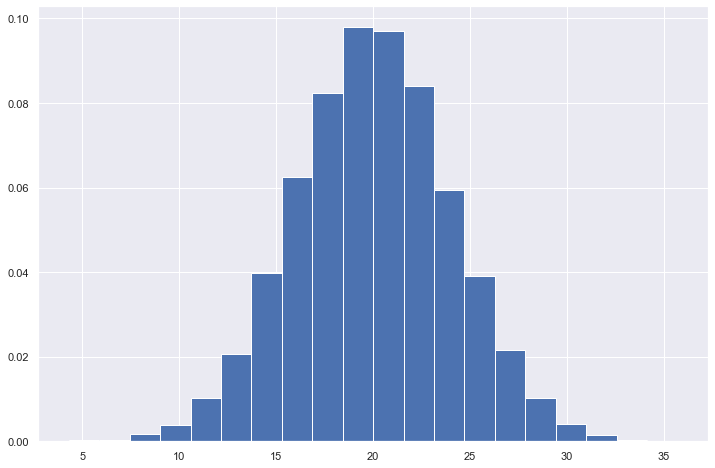

In [6]:
plt.hist(dataframe['normal'], bins = 20, density = True)
plt.show()

A figura acima descreve uma distribuição normal com média 20 e desvio padrão 4.

#### Os Quartis

Distribuição normal

In [7]:
Normalquant = dataframe['normal'].quantile([0,0.25,0.5,0.75,1])
Normalquant

0.00     4.310399
0.25    17.309638
0.50    19.989620
0.75    22.684324
1.00    35.704951
Name: normal, dtype: float64

Distribuição binomial

In [8]:
Binomialquant = dataframe['binomial'].quantile([0,0.25,0.5,0.75,1])
Binomialquant

0.00     6.0
0.25    17.0
0.50    20.0
0.75    23.0
1.00    36.0
Name: binomial, dtype: float64

#### Médias e Variâncias

In [23]:
norm_mean = dataframe['normal'].mean()
norm_std = dataframe['normal'].std()
norm_var = dataframe['normal'].var()
norm_mean, norm_std, norm_var

(19.991456066526293, 4.013849522013619, 16.110987985368958)

In [24]:
binom_mean = dataframe['binomial'].mean()
binom_std = dataframe['binomial'].std()
binom_var = dataframe['binomial'].var()
binom_mean, binom_std, binom_var

(20.097, 4.041190928725377, 16.331224122412277)

#### Questão 2

Avaliação do intervalo -Sigma até Sigma por ECDF

In [31]:
#ecdf_p1 -> ecdf da parte 1
ecdf_p1 = ECDF(dataframe['normal'])
ecdf_p1([norm_mean-norm_std,norm_mean+norm_std])

array([0.1571, 0.8409])

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [32]:
def q1():
    return (round(Normalquant[0.25] - Binomialquant[0.25],3), round(Normalquant[0.5] - Binomialquant[0.5],3), round(Normalquant[0.75] - Binomialquant[0.75],3))

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [33]:
def q2():
    return float(round(ecdf_p1([norm_mean-norm_std,norm_mean+norm_std])[1]-ecdf_p1([norm_mean-norm_std,norm_mean+norm_std])[0],3))

Para refletir:

* Esse valor se aproxima do esperado teórico, de 68.2%?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [34]:
def q3():
    return (round(binom_mean - norm_mean,3),round(binom_var - norm_var,3))

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [95]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [96]:
stars

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,False
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,False
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,False
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,False


#### Questão 4

Filtragem dos targets iguais a False

In [126]:
#stars_false_pulsar
starsfp = stars[stars['target'] == 0]
starsfp

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,False
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,False
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,False
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,False


In [127]:
mean_f = starsfp['mean_profile'].mean() 
std_f = starsfp['mean_profile'].std()
mean_f,std_f

(116.56125013454914, 17.475456225782587)

Padronização

In [128]:
false_pulsar_mean_profile_standardized = (starsfp['mean_profile'] - mean_f)/(std_f)

In [135]:
false_pulsar_mean_profile_standardized

0       -0.804181
1       -0.775123
2        1.155263
3       -1.592787
4       -1.315613
           ...   
17892    1.136934
17893    0.342963
17894    0.158776
17895   -0.117504
17896   -3.404704
Name: mean_profile, Length: 16258, dtype: float64

Quantis teóricos de (0.25, 0.5, 0.75, 0.8, 0.9, 0.95)

In [136]:
Quantis_teoricos = {
    0.25: sct.norm.ppf(0.25),
    0.5 : sct.norm.ppf(0.5),
    0.75: sct.norm.ppf(0.75),
    0.8 : sct.norm.ppf(0.8),
    0.9 : sct.norm.ppf(0.9),
    0.95: sct.norm.ppf(0.95)}

Quantis_teoricos

{0.25: -0.6744897501960817,
 0.5: 0.0,
 0.75: 0.6744897501960817,
 0.8: 0.8416212335729143,
 0.9: 1.2815515655446004,
 0.95: 1.6448536269514722}

In [137]:
ecdf = ECDF(false_pulsar_mean_profile_standardized)
ecdf(Quantis_teoricos[0.95])

0.9587895190060278

In [138]:
q4_array = ecdf([Quantis_teoricos[0.8], Quantis_teoricos[0.9], Quantis_teoricos[0.95]])
q4_array

array([0.80557264, 0.91056711, 0.95878952])

#### Questão 5

In [139]:
Quantis_teoricos

{0.25: -0.6744897501960817,
 0.5: 0.0,
 0.75: 0.6744897501960817,
 0.8: 0.8416212335729143,
 0.9: 1.2815515655446004,
 0.95: 1.6448536269514722}

In [145]:
Quantis_fp = false_pulsar_mean_profile_standardized.quantile([0.25, 0.5, 0.75])
Quantis_fp

0.25   -0.647153
0.50    0.039859
0.75    0.670655
Name: mean_profile, dtype: float64

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [146]:
def q4():
    return (round(q4_array[0],3), round(q4_array[1],3), round(q4_array[2],3))

In [147]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [148]:
def q5():
    return (round(Quantis_fp[0.25] - Quantis_teoricos[0.25],3), round(Quantis_fp[0.5] - Quantis_teoricos[0.5],3), round(Quantis_fp[0.75] - Quantis_teoricos[0.75],3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

In [150]:
q5()

(0.027, 0.04, -0.004)